In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reads in the Rotten Tomatoes csv data and prints the first five rows**

In [2]:
df = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
df.head()


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


**Reads in the movie gross csv data and prints the first five rows**

In [3]:
df_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


**Merges the two DataFrames together on the movie title and creates a DataFrame with only the data we want to work with**

In [4]:
merged = pd.merge(df, df_gross, left_on='movie_title', right_on='title')
df_rating_genres = merged[['movie_title','genres', 'tomatometer_rating', 'domestic_gross']].copy()

In [5]:
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
1,Going the Distance,Comedy,0.0,17800000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
3,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",50.0,100000.0
4,The Silence,"Art House & International, Drama, Mystery & Su...",88.0,100000.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


**Checks info() to see how many null values are in the DataFrame rows**

In [6]:
df_rating_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2148
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         2149 non-null   object 
 1   genres              2149 non-null   object 
 2   tomatometer_rating  2148 non-null   float64
 3   domestic_gross      2137 non-null   float64
dtypes: float64(2), object(2)
memory usage: 83.9+ KB


**Removes any rows with null values**

In [7]:
df_rating_genres.dropna(inplace=True)
df_rating_genres.head(12)

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
1,Going the Distance,Comedy,0.0,17800000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
3,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",50.0,100000.0
4,The Silence,"Art House & International, Drama, Mystery & Su...",88.0,100000.0
5,The Silence,"Horror, Mystery & Suspense",30.0,100000.0
6,Gone,"Horror, Mystery & Suspense",54.0,11700000.0
7,Gone,Mystery & Suspense,12.0,11700000.0
8,Fireflies in the Garden,Drama,22.0,70600.0
9,Priest,"Action & Adventure, Horror, Mystery & Suspense...",15.0,29100000.0


**Drops the duplicate values !!**

In [8]:
df_rating_genres.drop_duplicates(subset='movie_title', keep='last' , inplace=True)
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
5,The Silence,"Horror, Mystery & Suspense",30.0,100000.0
7,Gone,Mystery & Suspense,12.0,11700000.0
8,Fireflies in the Garden,Drama,22.0,70600.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


**Checks for any more missing values and how many rows were removed**

In [9]:
df_rating_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2148
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         2063 non-null   object 
 1   genres              2063 non-null   object 
 2   tomatometer_rating  2063 non-null   float64
 3   domestic_gross      2063 non-null   float64
dtypes: float64(2), object(2)
memory usage: 80.6+ KB


**Looks at the highest and lowest gross to get a feel for which genres do best**

In [10]:
df_sorted = df_rating_genres.sort_values('domestic_gross', ascending=False)
df_sorted

,movie_title,genres,tomatometer_rating,domestic_gross
343,Black Panther,"Action & Adventure, Drama, Science Fiction & F...",96.0,700100000.0
283,Avengers: Infinity War,"Action & Adventure, Science Fiction & Fantasy",85.0,678800000.0
923,Jurassic World,"Action & Adventure, Mystery & Suspense, Scienc...",70.0,652300000.0
1096,Marvel's The Avengers,"Action & Adventure, Science Fiction & Fantasy",92.0,623400000.0
1496,Star Wars: The Last Jedi,"Action & Adventure, Drama, Science Fiction & F...",90.0,620200000.0
...,...,...,...,...
267,Jackpot,Action & Adventure,59.0,800.0
238,Amityville: The Awakening,"Horror, Mystery & Suspense",30.0,700.0
863,Into the White,"Action & Adventure, Art House & International,...",45.0,700.0
120,2:22,"Drama, Mystery & Suspense",22.0,400.0


**Splits the genres in the genres row into a list containing the genres**

In [11]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.split(',', expand = False)

df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,[Comedy],87.0,4000000.0
2,Going the Distance,"[Comedy, Romance]",54.0,17800000.0
5,The Silence,"[Horror, Mystery & Suspense]",30.0,100000.0
7,Gone,[Mystery & Suspense],12.0,11700000.0
8,Fireflies in the Garden,[Drama],22.0,70600.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"[Art House & International, Comedy, Drama]",92.0,3100000.0
2145,Zombeavers,"[Action & Adventure, Comedy, Horror]",69.0,14900.0
2146,Zookeeper,"[Comedy, Romance]",14.0,80400000.0
2147,Zoolander 2,[Comedy],22.0,28800000.0


**Explodes the genres column which separates all the genres for each movie into its own column**

In [12]:
df_rating_genres = df_rating_genres.explode('genres')
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
2,Going the Distance,Comedy,54.0,17800000.0
2,Going the Distance,Romance,54.0,17800000.0
5,The Silence,Horror,30.0,100000.0
5,The Silence,Mystery & Suspense,30.0,100000.0
...,...,...,...,...
2146,Zookeeper,Romance,14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0
2148,Zootopia,Action & Adventure,98.0,341300000.0
2148,Zootopia,Animation,98.0,341300000.0


**Checks the data types of the columns**

In [13]:
df_rating_genres.dtypes

movie_title            object
genres                 object
tomatometer_rating    float64
domestic_gross        float64
dtype: object

**Strips any whitespace from the genres in the genres column**

In [14]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.strip()

**I only want to focus on genres with enough data points to generate sufficient means so I will only look at genres above 150 data values**

In [15]:
df_rating_genres['genres'].value_counts() 

Drama                        1145
Comedy                        632
Action & Adventure            496
Mystery & Suspense            403
Art House & International     249
Science Fiction & Fantasy     244
Romance                       175
Horror                        171
Documentary                   140
Kids & Family                 126
Animation                     116
Special Interest               89
Musical & Performing Arts      61
Sports & Fitness               21
Western                        19
Classics                       12
Television                     10
Faith & Spirituality            6
Anime & Manga                   1
Gay & Lesbian                   1
Cult Movies                     1
Name: genres, dtype: int64

**Creates a new DataFrame of all the movies classified as the specified genre**

In [16]:
df_comedy = df_rating_genres.loc[df_rating_genres['genres'] == 'Comedy']
df_romance = df_rating_genres.loc[df_rating_genres['genres'] == 'Romance']
df_horror = df_rating_genres.loc[df_rating_genres['genres'] == 'Horror']
df_mystery_suspence = df_rating_genres.loc[df_rating_genres['genres'] == 'Mystery & Suspense']
df_action_adventure = df_rating_genres.loc[df_rating_genres['genres'] == 'Action & Adventure']
df_animation = df_rating_genres.loc[df_rating_genres['genres'] == 'Animation']
df_art = df_rating_genres.loc[df_rating_genres['genres'] == 'Art House & International']
df_drama = df_rating_genres.loc[df_rating_genres['genres'] == 'Drama']

**Finds the mean of the domestic gross profit for all the relevent DataFrames**

In [18]:
#mean of the comedy gross profit 
y_comedy = round(df_comedy['domestic_gross'].mean())
y_drama = round(df_drama['domestic_gross'].mean())
y_romance = round(df_romance['domestic_gross'].mean())
y_horror = round(df_horror['domestic_gross'].mean())
y_mystery = round(df_mystery_suspence['domestic_gross'].mean())
y_action_adventure = round(df_action_adventure['domestic_gross'].mean())
y_animation = round(df_animation['domestic_gross'].mean())
y_art = round(df_art['domestic_gross'].mean())


**Finds the mean of the tomatometer rating for all the relevent genre DataFrames**

In [19]:
#mean of the comedy genre tomato ratings
x_comedy = round(df_comedy['tomatometer_rating'].mean())
x_romance = round(df_romance['tomatometer_rating'].mean())
x_horror = round(df_horror['tomatometer_rating'].mean())
x_mystery = round(df_mystery_suspence['tomatometer_rating'].mean())
x_action_adventure = round(df_action_adventure['tomatometer_rating'].mean())
x_animation = round(df_animation['tomatometer_rating'].mean())
x_art = round(df_art['tomatometer_rating'].mean())
x_drama = round(df_drama['tomatometer_rating'].mean())

**Graphs all the genre DataFrames to get an idea of which genre has the highest ratings and brought the most profit**

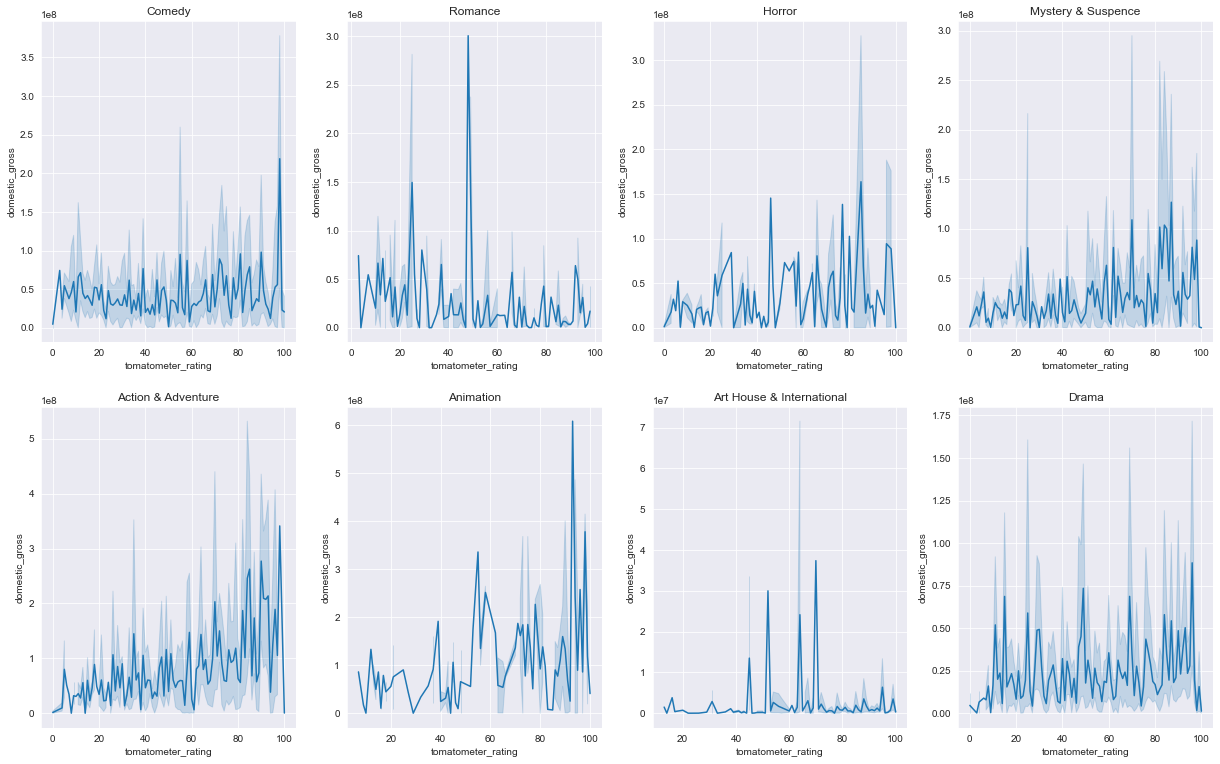

In [28]:
fig, axes =plt.subplots(nrows=2,ncols=4, figsize =(21,13))
sns.lineplot(data=df_comedy, x="tomatometer_rating", y="domestic_gross", ax=axes[0][0]).set(title='Comedy')
sns.lineplot(data=df_romance, x="tomatometer_rating", y="domestic_gross", ax=axes[0][1]).set(title='Romance')
sns.lineplot(data=df_horror, x="tomatometer_rating", y="domestic_gross", ax=axes[0][2]).set(title='Horror')
sns.lineplot(data=df_mystery_suspence, x="tomatometer_rating", y="domestic_gross", ax=axes[0][3]).set(title='Mystery & Suspence')
sns.lineplot(data=df_action_adventure, x="tomatometer_rating", y="domestic_gross", ax=axes[1][0]).set(title='Action & Adventure')
sns.lineplot(data=df_animation, x="tomatometer_rating", y="domestic_gross", ax=axes[1][1]).set(title='Animation')
sns.lineplot(data=df_art, x="tomatometer_rating", y="domestic_gross", ax=axes[1][2]).set(title='Art House & International')
sns.lineplot(data=df_drama, x="tomatometer_rating", y="domestic_gross", ax=axes[1][3]).set(title='Drama');

**Comedy, animation, and Action & Adventure appears to be the highest so this is a graph of them together**

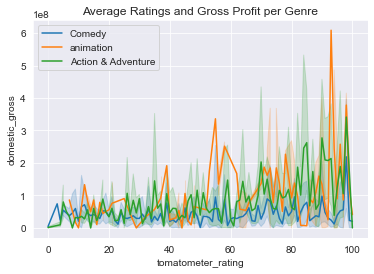

In [27]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
sns.lineplot(data=df_comedy, x="tomatometer_rating", y="domestic_gross", ax=ax).set(title='Average Ratings and Gross Profit per Genre')
sns.lineplot(data=df_animation, x="tomatometer_rating", y="domestic_gross", ax=ax)
sns.lineplot(data=df_action_adventure, x="tomatometer_rating", y="domestic_gross", ax=ax)
ax.legend(['Comedy', 'animation', 'Action & Adventure']);

**Heres a another look at them**

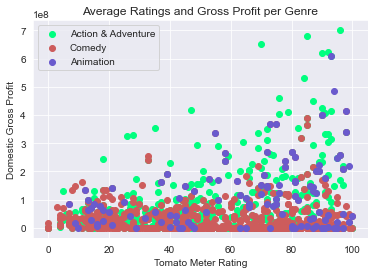

In [26]:
fig, ax = plt.subplots(1, 1)

ax.scatter(df_action_adventure['tomatometer_rating'], df_action_adventure["domestic_gross"], color="springgreen", label="Action & Adventure", linestyle="-")
ax.scatter(df_comedy['tomatometer_rating'], df_comedy["domestic_gross"], color="indianred", label="Comedy", linestyle="-")
ax.scatter(df_animation['tomatometer_rating'], df_animation["domestic_gross"], color="slateblue", label="Animation", linestyle="-")

ax.set_title('Average Ratings and Gross Profit per Genre')

ax.set_ylabel('Domestic Gross Profit')
ax.set_xlabel('Tomato Meter Rating')
ax.legend();


**This is a scatter plot of the means of the ratings and gross profit columns for all the genres graphed together on a scatter plot**

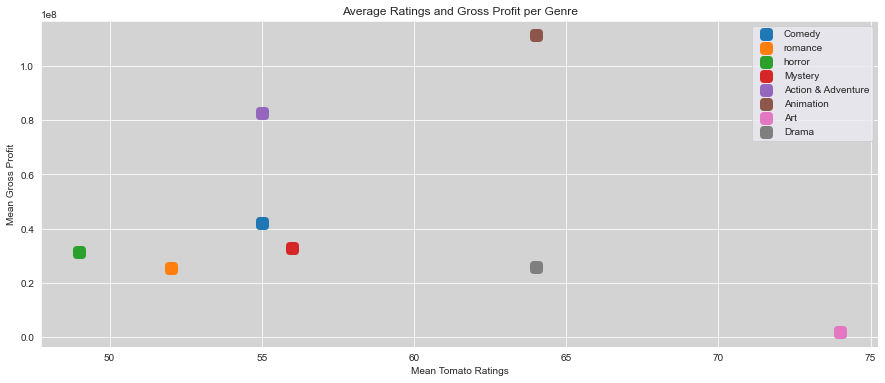

In [23]:
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(x_comedy,y_comedy, marker='s', linewidth=7)
ax.scatter(x_romance,y_romance, marker='s', linewidth=7)
ax.scatter(x_horror,y_horror, marker='s', linewidth=7)
ax.scatter(x_mystery,y_mystery, marker='s', linewidth=7)
ax.scatter(x_action_adventure,y_action_adventure, marker='s', linewidth=7)
ax.scatter(x_animation,y_animation, marker='s', linewidth=7)
ax.scatter(x_art,y_art, marker='s', linewidth=7)
ax.scatter(x_drama,y_drama, marker='s', linewidth=7)


ax.legend(['Comedy', 'romance', 'horror', 'Mystery', 'Action & Adventure', 'Animation',
          'Art', 'Drama'])

ax.set_xlabel('Mean Tomato Ratings')
ax.set_ylabel('Mean Gross Profit')
ax.set_title('Average Ratings and Gross Profit per Genre')
ax.set_facecolor('lightgrey')

**It appears that the Action & Adventure genre will bring the most domestic profit and have the highest rating since it has more data points than animation**